# import

In [2]:
from astropy.io import fits
import time
#import urllib2# python2
import urllib#python3

import datetime
#from itertools import ifilter python2
from collections import Counter, defaultdict
import xml.etree.ElementTree as ET
import h5py
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
#import bibtexparser
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord

pd.set_option('mode.chained_assignment','warn')

In [3]:
from astropy.table import Table
from astropy.io import fits
from astropy import units as u
from astropy import constants 

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from pylab import cm

import os
from collections import OrderedDict
from adjustText import adjust_text

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [5]:
from adjustText import adjust_text
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [6]:
import pandas as pd
import numpy as np
import os

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def drop_index(data):
    data=data.reset_index(drop=True)
    return data

In [7]:
from astropy.cosmology import FlatLambdaCDM,Planck13,Planck15,z_at_value
from astropy import units as u
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.27, Ode0=0.73)
#cosmo=FlatLambdaCDM(H0=73,Om0=0.3)

In [8]:
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular
from collections import Counter

In [9]:
from astropy.table import Table

## linerfit

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

In [11]:
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.modeling import models,fitting
from astropy.modeling.models import custom_model
from scipy.optimize import least_squares,curve_fit
from scipy.stats import f
import os

def linear(x,k,b):#linear
    return k*x+b

def broken_linear_curve(x,k1,k2,x0,b1,b2):#two lines divided by x0
    return np.where(x<x0,k1*x+b1,k2*x+b2)    

def broken_linear_curve_dot(x,k1,k2,x0,y0):#connect by x0,y0
    return np.where(x<x0,k1*(x-x0)+y0,k2*(x-x0)+y0) 

def power_law(x,S0,alpha):
    return S0*x**alpha



def alpha_calc(x,y):
    popt,pcov=curve_fit(power_law,x,y,p0=(10,0.5))
    S0=popt[0]
    alpha=popt[1]
    alpha_err=np.sqrt(np.diag(pcov))[1]
    return S0,alpha,alpha_err

def linear_calc(x,y):#linear_parameter
    popt,pcov=curve_fit(linear,x,y,p0=(1,1))
    return popt[0],popt[1]

def broken_linear_curve_calc(x,y):
    param_bounds=([-np.inf,0,-4,-np.inf,-np.inf],[-0,np.inf,-2.5,np.inf,np.inf])
    popt,pcov=curve_fit(broken_linear_curve,x,y,p0=(-1.5,1.5,-2.7,2,-1.5),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    b1=popt[3]
    b2=popt[4]
    return k1,k2,x0,b1,b2

def broken_linear_curve_dot_calc(x,y):
    param_bounds=([-np.inf,0,-3.5,0],[0,np.inf,-2.5,2])
    popt,pcov=curve_fit(broken_linear_curve_dot,x,y,p0=(-1.5,1.5,-2.7,1),bounds=param_bounds)
    k1=popt[0]
    k2=popt[1]
    x0=popt[2]
    y0=popt[3]
    return k1,k2,x0,y0


def decay_e_timescale(t,tau,S0):
    logey=-t/tau+S0
    return logey
#logy=-(x-x[0])/tau+S0

def decay_e_timescale_calc(x,y,tau_test=1000,S0_test=1):
    logey=np.log(y)
    param_bounds=([0,-np.inf],[np.inf,np.inf])
    popt,pcov=curve_fit(decay_e_timescale,x,logey,p0=(tau_test,S0_test),bounds=param_bounds)
    tau=popt[0]
    S0=popt[1]    
    return tau,S0


def exp_timescale(t,Tr,Tf,tp,S0):
    logey=-(np.exp((tp-t)/Tr)+np.exp((t-tp)/Tf))+S0
    return logey


def exp_timescale_calc(x,y,Tr_test=10000,Tf_test=2000,tp_test=50000,S0_test=1):
    logey=np.log(y)
    param_bounds=([1,1,45700,-np.inf],[np.inf,np.inf,58300,np.inf])
    popt,pcov=curve_fit(exp_timescale,x,logey,p0=(Tr_test,Tf_test,tp_test,S0_test),bounds=param_bounds)
    Tr=popt[0]
    Tf=popt[1]
    tp=popt[2] 
    S0=popt[3]    
    return Tr,Tf,tp,S0


## def alpha_calc_2freq_2logflux

In [12]:
def alpha_calc_2freq_2logflux(freq1,freq2,logflux1,logflux2):    
    #Get lightcurve values
    
    alpha= (logflux1-logflux2)/(np.log10(freq2)-np.log10(freq1))
    
    return alpha

In [14]:
import sys
#!{sys.executable} -m pip install package

In [15]:
{sys.executable}

{'/Users/lyubing/opt/anaconda3/bin/python3'}

# Surveyfits_path


In [16]:
Surveyfits_root='/Volumes/ExtremeSSD/Survey_fits/'

In [17]:
Surveyfits_path='/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits'

# 3C 3CRR

In [18]:
sample_3Cdir='/Volumes/ExtremeSSD/Survey_fits/3CR/3Csample'

## 3CR

In [19]:
p3CR_V=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表1')

p3CR_IV=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表2')

p3CR_III=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表3')

p3CR_II=pd.read_excel('%s/3CR.xlsx'%sample_3Cdir,sheet_name='工作表4')

## 3CRR

In [20]:
p3CRR=pd.read_csv('%s/3CRR_table_ascii.txt'%sample_3Cdir,header=0,delimiter='\s+')
p3CRR_NED=pd.read_csv('%s/3CRR_NED.py'%sample_3Cdir,header=None,delimiter='|')
p3CRR_NED.columns=['index','1','Name','*','Ned_name','ra','dec','class','z','z_qual','index0']

Coord_p3CRR_NED = SkyCoord(p3CRR_NED['ra'], p3CRR_NED['dec'], frame="icrs",) 

p3CRR_NED['ra_deg']=Coord_p3CRR_NED.ra.deg
p3CRR_NED['dec_deg']=Coord_p3CRR_NED.dec.deg

In [21]:
p3CRR_NEDX = np.empty((len(p3CRR_NED), 2), dtype=np.float64)
p3CRR_NEDX[:, 0] = p3CRR_NED['ra_deg']
p3CRR_NEDX[:, 1] = p3CRR_NED['dec_deg']

In [ ]:
p3CRR.columns

In [22]:
p3CRR_OIII=pd.read_excel('%s/3CRROIIIdata.xlsx'%sample_3Cdir,sheet_name='Sheet1')

In [ ]:
p3CRR_OIII

In [ ]:
p3CRR_OIII.columns

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')

log_L200=np.linspace(22,32,10)
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)
delta_yLOIII=1.0

#p3CR
plotdata=p3CRR_OIII
column_x=4
column_y=5
column_label=1

print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    name_class=plotdata.loc[i,plotdata.columns[column_label]] 
    
    if isinstance(plotdata[plotdata.columns[column_x]][i],(int,float)) and isinstance(plotdata[plotdata.columns[column_y]][i],(int,float)):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='.',label=name_class.strip())
        
        if plotdata[plotdata.columns[column_x]][i]*0.73+16.6-plotdata[plotdata.columns[column_y]][i]>delta_yLOIII:
            print(plotdata['Name'][i])
'''            ax.text(
                    plotdata[plotdata.columns[column_x]][i],
                    plotdata[plotdata.columns[column_y]][i],
                    plotdata['Name'][i],
            
            )'''

#set_ax_locator(ax,xma=0.2,xmi=0.1,yma=10,ymi=5)
set_ax_tick(ax)

#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_xlabel(r'log$ L_\mathrm{ 151MHz}$')
ax.set_ylabel(r'log$L_\mathrm{OIII}$')

ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars

#hdl = [h[0] for h in handles]
hdl=handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)

# use them in the legend
#by_label = OrderedDict(zip(labels, handles)) 
#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 0.9),loc=2, numpoints=1, fontsize=11. )


#ax.semilogy()
#ax.semilogx()

#ax.set_xlim(0.0,0.6)
#plt.legend()
fig.savefig('3CRR_cat_LOIII_Lradio.png', dpi=100, transparent=False, bbox_inches='tight')


## p3CRR_withdistance

In [ ]:
p3CRR_distance=p3CRR[p3CRR['5-GHz_core_flux'].str.contains('<')==False]
p3CRR_distance=p3CRR_distance[p3CRR_distance['5-GHz_core_flux'].str.contains('--')==False]
p3CRR_distance=drop_index(p3CRR_distance)

In [ ]:
len(p3CRR_distance),len(p3CRR)

In [ ]:
for i in range(len(p3CRR_distance)):
     p3CRR_distance.loc[i,'5GHz_flux_Jy']=float(p3CRR_distance.loc[i,'5-GHz_core_flux'])*1.0e-3
        
p3CRR_distance['D_cm']=cosmo.luminosity_distance(z=p3CRR_distance['Redshift'].values).to(u.cm).value
p3CRR_distance['L178MHz']=p3CRR_distance['178-MHz_flux']*4*np.pi*p3CRR_distance['D_cm']**2*1.0e-23
p3CRR_distance['logL178MHz']=np.log10(p3CRR_distance['L178MHz'])

p3CRR_distance['L5GHz']=p3CRR_distance['5GHz_flux_Jy']*4*np.pi*p3CRR_distance['D_cm']**2*1.0e-23
p3CRR_distance['logL5GHz']=np.log10(p3CRR_distance['L5GHz'])

        

In [ ]:
p3CRR_distance.columns

In [ ]:
for i in range(len(p3CRR_distance)):
    freq1=5e9
    freq2=178e6
    logflux1=p3CRR_distance.loc[i,'logL5GHz']
    logflux2=p3CRR_distance.loc[i,'logL178MHz']
    
    p3CRR_distance.loc[i,'alpha']=alpha_calc_2freq_2logflux(freq1,freq2,logflux1,logflux2)

In [ ]:
p3CRR_distance.columns

## alpha_vs_spectral_index

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

#ax.hist(BAT_105m_Seyfert_data_1['sigma_m_w1_neo'],bins=50,lw=2,histtype='step',ec='red', fc='red',label='Type1',linestyle='-.')

#ax.axvline(np.mean(BAT_105m_Seyfert_data_1['sigma_m_w1_neo']),color='red',ls=':')

#p3CR
plotdata=p3CRR_distance
column_x=4
column_y=14
print(plotdata.columns[column_x],plotdata.columns[column_y])
for i in range(len(plotdata)):
    if isinstance(plotdata[plotdata.columns[column_x]][i],float) and isinstance(plotdata[plotdata.columns[column_y]][i],float):
        ax.scatter(plotdata[plotdata.columns[column_x]][i],
                   plotdata[plotdata.columns[column_y]][i],
                   color='black',marker='*',label='3CRR')
        
set_ax_tick(ax)
ax.set_xlim(0.1,2.9)
ax.plot(np.linspace(0.1,3.1,10),np.linspace(0,3,10),ls=':')
#ax.set_xlabel('Type')
#ax2.set_xlabel('Type')
ax.set_ylabel(r'$\alpha_{178MHz-5GHz}$')
ax.set_xlabel(r'$\alpha_{178MHz-750MHz}$')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),
          loc=2, numpoints=1,ncol=1,fontsize=11.)        
        

In [ ]:
np.mean(p3CRR_distance['Sp.index']),np.std(p3CRR_distance['Sp.index'])

In [ ]:
np.mean(p3CRR_distance['alpha']),np.std(p3CRR_distance['alpha'])

## clip

In [ ]:
p3CRR_OIII.columns

In [ ]:
p3CRR_OIII['select']=0
for index, i in enumerate(p3CRR_OIII['L_[OIII]']):
    if isinstance(p3CRR_OIII['L_[OIII]'][index],(int,float)) and isinstance(p3CRR_OIII['L_151'][index],(int,float)):
        p3CRR_OIII.loc[index,'select']=1                

p3CRR_OIII_float=p3CRR_OIII.select_dtypes(include='number')

In [ ]:
p3CRR_OIII

In [ ]:
p3CRR_OIII_float=p3CRR_OIII[p3CRR_OIII['select']==1]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_[OIII]'].str.contains('<')==False]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_151'].str.contains('<')==False]
#p3CRR_OIII_float=p3CRR_OIII_float[p3CRR_OIII_float['L_151'].str.contains('>')==False]
p3CRR_OIII_float=drop_index(p3CRR_OIII_float)

In [ ]:
len(p3CRR_OIII_float),len(p3CRR_OIII)

In [ ]:
p3CRR_OIII_float['L_151'].dtype

p3CRR_OIII_float['L_[OIII]'].astype(float)

In [ ]:
dataplot=p3CRR_OIII_float

x=np.array(dataplot['L_151']).astype(float)
y=np.array(dataplot['L_[OIII]']).astype(float)
#x= np.log10(dataplot['L200MHz']) #log
#y= np.log10(dataplot['oiii_5007_Lum'])#log
#xerr= dataplot['L200MHz_err']/np.log(10)/x
#yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y

weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

In [ ]:
fitted_line.slope.value,fitted_line.intercept.value

In [ ]:
len(mask),len(x),np.sum(mask)

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(22,32,10)
y_log_L200=0.73*log_L200+16.6


sigma=2.0

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fit $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data %.1f $\sigma$"%sigma)

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{151MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('3CRR')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
fig.savefig('3CRR_cat_LOIII_Lradio_clip_%s_sigma.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')


## select fading

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(22,29,10)
y_log_L200=0.73*log_L200+16.6

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

for index, (name,x_,y_,mask_) in enumerate(zip(p3CRR_OIII_float['Name'].values,x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            print(index,name,'Fading')
            p3CRR_selectFading=p3CRR_distance[p3CRR_distance['3CRR_name']==name]           
            
            if len(p3CRR_selectFading)>0:
                #p3CRR_selectFading=drop_index(p3CRR_selectFading)
                #print(p3CRR_selectFading.loc[0,'alpha'],p3CRR_selectFading.loc[0,'Sp.index'])
                print()
            
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")            
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{151MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('3CRR')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
#plt.show()
fig.savefig('3CRR_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            

# SDSS_RG_18286

In [ ]:
SDSS_RG_dir='/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits/AGN/On the fundamental dichotomy in the local radio-AGN population accretion, evolution and host galaxy properties. (2012)/Properties of 18286 SDSS radio galaxies/J_MNRAS_421_1569/'
SDSS_RG_18286=Table.read('%s/table1.dat'%SDSS_RG_dir,readme='%s/ReadMe'%SDSS_RG_dir,format='ascii.cds')

SDSS_RG_18286['RAdeg'] = SDSS_RG_18286['RAhour']*15.0




In [71]:
!open '/Volumes/ExtremeSSD/Survey_fits/Survey_fits/Survey_fits/AGN/On the fundamental dichotomy in the local radio-AGN population accretion, evolution and host galaxy properties. (2012)/Properties of 18286 SDSS radio galaxies/J_MNRAS_421_1569/'

In [ ]:
SDSS_RG_18286.colnames

## SDSS_RG_18286_specid

In [ ]:
SDSS_RG_18286_specid_path='/Volumes/ExtremeSSD/Survey_fits/MyTable_Radiogalaxies_brettlv.csv'

In [ ]:
SDSS_RG_18286_specid=pd.read_csv(SDSS_RG_18286_specid_path,header=0)

In [ ]:
SDSS_RG_18286_specid

for index,specid in enumerate(SDSS_RG_18286_specid['specobjid']):
    if specid in SDSS_galaxies_emission_line['specObjId']:
        print(index,specid)

# SDSS_galaxies_emission_line

In [ ]:
SDSS_galaxies_emission_line_path='/Volumes/ExtremeSSD/Survey_fits/MyTable_galaxies_emission_line.csv'

In [ ]:
SDSS_galaxies_emission_line=pd.read_csv(SDSS_galaxies_emission_line_path,header=0)
SDSS_galaxies_array=SDSS_galaxies_emission_line.to_records()

In [ ]:
len(SDSS_galaxies_emission_line)

In [ ]:
SDSS_galaxies_emission_line[:1]

In [ ]:
SDSS_galaxies_emission_line.columns

In [ ]:
SDSS_galaxies_array.dtype.names

In [ ]:
00 20 50.6707266504  +27 44 40.212376512

# SDSS J135445.66+002050.2

In [ ]:
SkyCoord(ra='00h20m50.6707266504s', dec='+27d44m40.212376512s', frame="icrs",) 

## Unit

1e-17 erg/s/cm^2

In [ ]:
dataplot=SDSS_galaxies_emission_line[:100]

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


ax.errorbar(dataplot['h_alpha_flux'],dataplot['h_beta_flux'],
            xerr=dataplot['h_alpha_flux_err'],
            yerr=dataplot['h_beta_flux_err'],
             fmt="ko", fillstyle="none",
            )
ax.semilogx()
ax.semilogy()
plt.xlabel(r'H$\alpha$')
plt.ylabel(r'H$\beta$')
plt.show

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

ax.errorbar(dataplot['h_alpha_flux'],dataplot['oiii_5007_flux'],
            xerr=dataplot['h_alpha_flux_err'],
            yerr=dataplot['oiii_5007_flux_err'],
             fmt="ko", fillstyle="none",
            )


ax.semilogx()
ax.semilogy()
plt.xlabel(r'H$\alpha$')
plt.ylabel(r'O$_{III}$')
plt.show





In [ ]:
a=0.1*np.e**0.1
b=1/9
c=-np.log10(0.9)

In [ ]:
print(a,b,c)

# TGSS

In [ ]:
We present the first full release of a survey of the 150MHz radio
    sky, observed with the Giant Metrewave Radio Telescope (GMRT) between
    April 2010 and March 2012 as part of the TIFR GMRT Sky Survey (TGSS)
    project. 
    
The majority of pointing images have a noise level below 5mJy/beam with an
    approximate resolution of 25"x25" (or 25"x25"/cos(Dec-19{deg}) for
    pointings south of 19{deg} declination).    

In [ ]:
TGSS_dir='%s/TGSS ADR1 The GMRT 150MHz all-sky radio survey/J_A+A_598_A78'%Surveyfits_path #mJy/beam
TGSSdata=Table.read('%s/table3.dat'%TGSS_dir,readme='%s/ReadMe'%TGSS_dir,format='ascii.cds')

In [ ]:
TGSSdata.colnames

# LoTSS

The LOw-Frequency ARray (LOFAR) Two-metre Sky Survey (LoTSS) Second
    data release contains 120-168MHz images covering 27% of the northern
    sky. The coverage is split into two regions centred at approximately
    12h45m +44{deg}30' and 1h00m +28{deg}00' and spanning 4178 and 1457
    square degrees respectively. A catalogue of 4396228 radio components
    is derived from our 6" resolution total intensity (Stokes I) maps
    where the median rms sensitivity is 83uJy/beam; the flux density scale
    accuracy is approximately 10%; 

In [ ]:
LoTSS_dir='%s/LOFAR Two-metre Sky Survey (LoTSS) DR2/J_A+A_659_A1'%Surveyfits_path #mJy
LoTSSdata=Table.read('%s/catalog.dat'%LoTSS_dir,readme='%s/ReadMe'%LoTSS_dir,format='ascii.cds')

# GLEAM

200 MHz

In [ ]:
gleam=fits.open('%s/GLEAM/GLEAM_EGC_v2.fits'%Surveyfits_path)
gleamdata=gleam[1].data

GGSM=fits.open('%s/GLEAM/GGSM.fits'%Surveyfits_path)
GGSMdata=GGSM[1].data #Jy

In [ ]:
GGSMdata.columns

# WISE_AGN_cat

In [ ]:
WISE_AGN_cat=fits.open('%s/AGN/The WISE AGN candidates catalogs/J_ApJS_234_23_r90cat.dat.gz.fits'%Surveyfits_path)

# Crossmatch

## X

In [ ]:
SDSS_RG_18286X = np.empty((len(SDSS_RG_18286), 2), dtype=np.float64)
SDSS_RG_18286X[:, 0] = SDSS_RG_18286['RAhour']*15.0
SDSS_RG_18286X[:, 1] = SDSS_RG_18286['DEdeg']

In [ ]:
SDSS_galaxies_emission_line.head()#.columns

In [ ]:
SDSS_galaxies_emission_lineX = np.empty((len(SDSS_galaxies_emission_line), 2), dtype=np.float64)
SDSS_galaxies_emission_lineX[:, 0] = SDSS_galaxies_emission_line['ra']
SDSS_galaxies_emission_lineX[:, 1] = SDSS_galaxies_emission_line['dec']

SDSS_galaxies_emission_line[:,0]

In [ ]:
TGSSX = np.empty((len(TGSSdata), 2), dtype=np.float64)
TGSSX[:, 0] = TGSSdata['RAdeg']
TGSSX[:, 1] = TGSSdata['DEdeg']

In [ ]:
gleamX = np.empty((len(gleamdata), 2), dtype=np.float64)
gleamX[:, 0] = gleamdata['RAJ2000']
gleamX[:, 1] = gleamdata['DEJ2000']

GGSMX = np.empty((len(GGSMdata), 2), dtype=np.float64)
GGSMX[:, 0] = GGSMdata['RAJ2000']
GGSMX[:, 1] = GGSMdata['DEJ2000']

LoTSSdata.colnames

In [ ]:
LoTSSX = np.empty((len(LoTSSdata), 2), dtype=np.float64)
LoTSSX[:, 0] = LoTSSdata['RAdeg']
LoTSSX[:, 1] = LoTSSdata['DEdeg']

## SDSS_RG_18286X,SDSS_galaxies_emission_lineX

In [ ]:
# crossmatch catalogs
max_radius = 1. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(SDSS_RG_18286X,SDSS_galaxies_emission_lineX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (SDSS_RG_18286X.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()


In [ ]:
len(match)

In [ ]:
'z',
 'zwarning',
 'ra',
 'dec',
 'specObjId',
 'h_beta_flux',
 'h_beta_flux',
 'h_alpha_flux',
 'h_alpha_flux_err',
 'oiii_5007_flux',
 'oiii_5007_flux_err'

In [ ]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line=SDSS_RG_18286[match]
#drop_index()
SDSS_galaxies_emission_line_match_SDSS_RG_18286=SDSS_galaxies_array[ind[match]] 
print(len(SDSS_RG_18286_match_SDSS_galaxies_emission_line),np.sum(match))
print(len(SDSS_galaxies_emission_line_match_SDSS_RG_18286))

In [ ]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line['z_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['z']                                                                                                     
SDSS_RG_18286_match_SDSS_galaxies_emission_line['ra_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['ra']
                                                                                                     
                                                                                                     
SDSS_RG_18286_match_SDSS_galaxies_emission_line['dec_']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['dec']

SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_alpha_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_alpha_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_alpha_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_alpha_flux_err']


SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_beta_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_beta_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['h_beta_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['h_beta_flux_err']


SDSS_RG_18286_match_SDSS_galaxies_emission_line['oiii_5007_flux']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['oiii_5007_flux']
SDSS_RG_18286_match_SDSS_galaxies_emission_line['oiii_5007_flux_err']=SDSS_galaxies_emission_line_match_SDSS_RG_18286['oiii_5007_flux_err']


In [ ]:
len(SDSS_RG_18286_match_SDSS_galaxies_emission_line)

In [ ]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line.colnames

In [ ]:
SDSS_RG_18286_match_SDSS_galaxies_emission_line[:5]

### RG_OIIIX

In [ ]:
RG_OIIIX = np.empty((len(SDSS_RG_18286_match_SDSS_galaxies_emission_line), 2), dtype=np.float64)
RG_OIIIX[:, 0] = SDSS_RG_18286_match_SDSS_galaxies_emission_line['RAdeg']
RG_OIIIX[:, 1] = SDSS_RG_18286_match_SDSS_galaxies_emission_line['DEdeg']

# RG_OIII TGSS

## MatchNwithradius

#crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
#Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,TGSSX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

## RG_OIIIX,TGSSX

In [ ]:
# crossmatch catalogs
max_radius = 10. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,TGSSX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [ ]:
RG_OIII_match_TGSS=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
TGSS_match_RG_OIII=TGSSdata[ind[match]] 

RG_OIII_match_TGSS['F200MHz']=TGSS_match_RG_OIII['Stotal'] #mJy
RG_OIII_match_TGSS['F200MHz_err']=TGSS_match_RG_OIII['e_Stotal']
RG_OIII_match_TGSS['Dcm']=cosmo.luminosity_distance(RG_OIII_match_TGSS['z']).to(u.cm).value

RG_OIII_match_TGSS['L200MHz']=4*np.pi*RG_OIII_match_TGSS['Dcm']**2*RG_OIII_match_TGSS['F200MHz']*1.0e-26
RG_OIII_match_TGSS['L200MHz_err']=4*np.pi*RG_OIII_match_TGSS['Dcm']**2*RG_OIII_match_TGSS['F200MHz_err']*1.0e-26

RG_OIII_match_TGSS['logL200MHz']=np.log10(RG_OIII_match_TGSS['L200MHz'])

RG_OIII_match_TGSS['h_alpha_Lum']=RG_OIII_match_TGSS['h_alpha_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['h_alpha_Lum_err']=RG_OIII_match_TGSS['h_alpha_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['h_beta_Lum']=RG_OIII_match_TGSS['h_beta_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['h_beta_Lum_err']=RG_OIII_match_TGSS['h_beta_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['oiii_5007_Lum']=RG_OIII_match_TGSS['oiii_5007_flux']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17
RG_OIII_match_TGSS['oiii_5007_Lum_err']=RG_OIII_match_TGSS['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_TGSS['Dcm']**2*1.0e-17


RG_OIII_match_TGSS['OIII_snr']=RG_OIII_match_TGSS['oiii_5007_flux']/RG_OIII_match_TGSS['oiii_5007_flux_err']
RG_OIII_match_TGSS_selectsnrgt5=RG_OIII_match_TGSS[RG_OIII_match_TGSS['OIII_snr']>5]

In [ ]:
RG_OIII_match_TGSS_selectsnrgt5

In [ ]:
len(SDSS_RG_18286_match_SDSS_galaxies_emission_line),len(RG_OIII_match_TGSS)

In [ ]:
RG_OIII_match_TGSS

TGSS_match_RG_OIII

TGSS_match_RG_OIII#.colnames

### plot OIII 200MHz

RG_OIII_match_TGSS_pd=RG_OIII_match_TGSS.to_pandas()
RG_OIII_match_TGSS_removeNAN=RG_OIII_match_TGSS_pd[RG_OIII_match_TGSS_pd['L200MHz'].notnull()]
RG_OIII_match_TGSS_removeNAN=RG_OIII_match_TGSS_pd[RG_OIII_match_TGSS_pd['oiii_5007_Lum'].notnull()]
RG_OIII_match_TGSS_removeNAN=drop_index(RG_OIII_match_TGSS_removeNAN)

In [ ]:
len(RG_OIII_match_TGSS_selectsnrgt5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

'''x=np.array(RG_OIII_match_TGSS['L200MHz'])
y=np.array(RG_OIII_match_TGSS['oiii_5007_Lum'])

xerr=np.array(RG_OIII_match_TGSS['L200MHz_err'])
yerr=np.array(RG_OIII_match_TGSS['oiii_5007_Lum_err'])
'''

dataplot=RG_OIII_match_TGSS_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

In [ ]:
plt.plot(x[mask], y[mask], 'x',
         color='#d62728', label="rejected data")

In [ ]:
len(mask),np.sum(mask),len(mask)-np.sum(mask),

In [ ]:
len(y[mask])

In [ ]:
# RG_OIII_match_TGSS_selectsnrgt5['L200MHz'],RG_OIII_match_TGSS_selectsnrgt5['oiii_5007_Lum']

In [ ]:
slope,intercept=linear_calc(x,y)
print(slope,intercept)

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3C $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{150MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match TGSS')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
plt.show()
plt.close()
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')


### select fading 

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_TGSS_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_,
                #xerr=xerr, yerr=yerr,
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_TGSS_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{150MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match TGSS')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('TGSS_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            


In [ ]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing=RG_OIII_match_TGSS_selectsnrgt5[RG_OIII_match_TGSS_selectsnrgt5['fading1dex']==1]

RG_OIII_match_TGSS_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_TGSS_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)



In [ ]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing

# RG_OIII GLEAM

#crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
#Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,GGSMX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [ ]:
# crossmatch catalogs
max_radius = 30. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,GGSMX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [ ]:
GGSMdata.columns

In [ ]:
RG_OIII_match_GGSM=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
GGSM_match_RG_OIII=GGSMdata[ind[match]] 

RG_OIII_match_GGSM['F200MHz']=GGSM_match_RG_OIII['S_200']*1000 # mJy
RG_OIII_match_GGSM['F200MHz_err']=GGSM_match_RG_OIII['S_200']*1000*0.08 # 8%error
RG_OIII_match_GGSM['Dcm']=cosmo.luminosity_distance(RG_OIII_match_GGSM['z']).to(u.cm).value

RG_OIII_match_GGSM['L200MHz']=4*np.pi*RG_OIII_match_GGSM['Dcm']**2*RG_OIII_match_GGSM['F200MHz']*1.0e-26
RG_OIII_match_GGSM['L200MHz_err']=4*np.pi*RG_OIII_match_GGSM['Dcm']**2*RG_OIII_match_GGSM['F200MHz_err']*1.0e-26

RG_OIII_match_GGSM['logL200MHz']=np.log10(RG_OIII_match_GGSM['L200MHz'])

RG_OIII_match_GGSM['h_alpha_Lum']=RG_OIII_match_GGSM['h_alpha_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['h_alpha_Lum_err']=RG_OIII_match_GGSM['h_alpha_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17


RG_OIII_match_GGSM['h_beta_Lum']=RG_OIII_match_GGSM['h_beta_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['h_beta_Lum_err']=RG_OIII_match_GGSM['h_beta_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17


RG_OIII_match_GGSM['oiii_5007_Lum']=RG_OIII_match_GGSM['oiii_5007_flux']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17
RG_OIII_match_GGSM['oiii_5007_Lum_err']=RG_OIII_match_GGSM['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_GGSM['Dcm']**2*1.0e-17

RG_OIII_match_GGSM['OIII_snr']=RG_OIII_match_GGSM['oiii_5007_flux']/RG_OIII_match_GGSM['oiii_5007_flux_err']
RG_OIII_match_GGSM_selectsnrgt5=RG_OIII_match_GGSM[RG_OIII_match_GGSM['OIII_snr']>5]


In [ ]:
RG_OIII_match_GGSM_selectsnrgt5[:5]

In [ ]:
len(RG_OIII_match_GGSM_selectsnrgt5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

'''x=np.array(RG_OIII_match_TGSS['L200MHz'])
y=np.array(RG_OIII_match_TGSS['oiii_5007_Lum'])

xerr=np.array(RG_OIII_match_TGSS['L200MHz_err'])
yerr=np.array(RG_OIII_match_TGSS['oiii_5007_Lum_err'])
'''

dataplot=RG_OIII_match_GGSM_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

len(mask),np.sum(mask),len(mask)-np.sum(mask),

plt.plot(x[mask], y[mask], 'x',
         color='#d62728', label="rejected data")

In [ ]:
slope,intercept=linear_calc(x,y)
print(slope,intercept)

In [ ]:
len(x),len(y),len(filtered_data)

## plot

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{200MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match GGSM')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')


## select fading

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_GGSM_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_,
                #xerr=xerr, yerr=yerr,
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_GGSM_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{200MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match GGSM')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('GGSM_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')

In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing=RG_OIII_match_GGSM_selectsnrgt5[RG_OIII_match_GGSM_selectsnrgt5['fading1dex']==1]

RG_OIII_match_GGSM_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_GGSM_selectsnrgt5_fadeing.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)


RG_OIII_match_GGSM_selectsnrgt5_fadeing.colnames

In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing

# RG_OIII LoTSS

In [ ]:
# crossmatch catalogs
fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

max_radius = np.arange(1,30)*1.0 / 3600  # 1 arcsec
for i in max_radius:
    dist, ind = crossmatch_angular(RG_OIIIX,LoTSSX, i)
    match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'
    ax.scatter(i*3600,np.sum(match),color='black')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N')

ax.set_xlim(0, max(max_radius)*3600)
set_ax_tick(ax)
plt.show()
plt.close()

In [ ]:
# crossmatch catalogs
max_radius = 30. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(RG_OIIIX,LoTSSX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (RG_OIIIX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()
plt.close()

## plot

In [ ]:
RG_OIII_match_LoTSS=SDSS_RG_18286_match_SDSS_galaxies_emission_line[match]
#drop_index()
LoTSS_match_RG_OIII=LoTSSdata[ind[match]]

In [ ]:
LoTSS_match_RG_OIII[:2]

LoTSS_match_RG_OIII.colnames

In [ ]:
RG_OIII_match_LoTSS['F200MHz']=LoTSS_match_RG_OIII['SpeakTot'] #mJy
RG_OIII_match_LoTSS['F200MHz_err']=LoTSS_match_RG_OIII['e_SpeakTot']
RG_OIII_match_LoTSS['Dcm']=cosmo.luminosity_distance(RG_OIII_match_LoTSS['z']).to(u.cm).value

RG_OIII_match_LoTSS['L200MHz']=4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*RG_OIII_match_LoTSS['F200MHz']*1.0e-26
RG_OIII_match_LoTSS['L200MHz_err']=4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*RG_OIII_match_LoTSS['F200MHz_err']*1.0e-26

RG_OIII_match_LoTSS['logL200MHz']=np.log10(RG_OIII_match_LoTSS['L200MHz'])

RG_OIII_match_LoTSS['h_alpha_Lum']=RG_OIII_match_LoTSS['h_alpha_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['h_alpha_Lum_err']=RG_OIII_match_LoTSS['h_alpha_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17


RG_OIII_match_LoTSS['h_beta_Lum']=RG_OIII_match_LoTSS['h_beta_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['h_beta_Lum_err']=RG_OIII_match_LoTSS['h_beta_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17


RG_OIII_match_LoTSS['oiii_5007_Lum']=RG_OIII_match_LoTSS['oiii_5007_flux']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17
RG_OIII_match_LoTSS['oiii_5007_Lum_err']=RG_OIII_match_LoTSS['oiii_5007_flux_err']*4*np.pi*RG_OIII_match_LoTSS['Dcm']**2*1.0e-17

RG_OIII_match_LoTSS['OIII_snr']=RG_OIII_match_LoTSS['oiii_5007_flux']/RG_OIII_match_LoTSS['oiii_5007_flux_err']
RG_OIII_match_LoTSS_selectsnrgt5=RG_OIII_match_LoTSS[RG_OIII_match_LoTSS['OIII_snr']>5]

In [ ]:
len(RG_OIII_match_LoTSS_selectsnrgt5)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip
from astropy.modeling import models, fitting

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# generate x, y data non-uniformly spaced in x
# add noise to y measurements

dataplot=RG_OIII_match_LoTSS_selectsnrgt5
x= np.log10(dataplot['L200MHz'])
y= np.log10(dataplot['oiii_5007_Lum'])
xerr= dataplot['L200MHz_err']/np.log(10)/x
yerr= dataplot['oiii_5007_Lum_err']/np.log(10)/y


weights=np.zeros(len(x))+1

#xerr

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize the outlier removal fitter
or_fit = fitting.FittingWithOutlierRemoval(fit, sigma_clip, niter=3, sigma=2.0)

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line, mask = or_fit(line_init, x, y, weights=1.0/weights)
filtered_data = np.ma.masked_array(y, mask=mask)

print(fitted_line)

slope,intercept=linear_calc(x,y)
print(slope,intercept)

In [ ]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.errorbar(x, y,
            #xerr=xerr, yerr=yerr,
            markersize=10,
            fmt="k.", fillstyle="none", label=r"Clipped Data 2$\sigma$")

ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{120-168MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match LoTSS')

#ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
plt.legend(fontsize=11.)
#plt.show()
plt.savefig('L200MHz_LOIII_LoTSS_SDSS.png',dpi=100, transparent=False, bbox_inches='tight')

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5.colnames

## select_fading

In [ ]:
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)


log_L200=np.linspace(28,37,10) #best fit for 3CRR sample
y_log_L200=0.73*log_L200+16.6
ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

y_log_L200_fitted_line= fitted_line.slope.value*log_L200+fitted_line.intercept.value
ax.plot(log_L200, fitted_line(log_L200), color='red',ls='-', linewidth=2,label='Fitted Model $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200_fitted_line-1,ls=':',color='red',linewidth=2)
ax.plot(log_L200,y_log_L200_fitted_line+1,ls=':',color='red',linewidth=2)


ax.errorbar(x, filtered_data, markersize=3,
            fmt="ko", label="Fitted Data")

RG_OIII_match_LoTSS_selectsnrgt5['fading1dex']=0

for index, (ra_,dec_,x_,y_,mask_) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5['DEdeg'],x,y,mask)):
    if mask_:
        if x_*fitted_line.slope.value+fitted_line.intercept.value>y_:
            ax.errorbar(x_, y_, 
                #xerr=xerr, yerr=yerr, 
                markersize=10,
                fmt="k.", fillstyle="none", label=r"Fading 2 $\sigma$")            
            if x_*fitted_line.slope.value+fitted_line.intercept.value>y_+1:
                RG_OIII_match_LoTSS_selectsnrgt5['fading1dex'][index]=1
                #print(index,ra_,dec_,'Fading more than 1dex')

        else:
            #print(name,'Rasing')
            ax.errorbar(x_, y_, 
            #xerr=xerr, yerr=yerr, 
            markersize=10,
            fmt="k*", fillstyle="none", label=r"Rasing 2 $\sigma$")            
            
#plt.plot(x, line_orig(x), 'b-', label='Simulation Model')
#plt.xlim(-2,12)
#plt.ylim(-5,25)

set_ax_tick(ax)
#set_ax_locator(ax)

#ax.set_xlabel(r'$L_{5GHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
#ax.set_ylabel(r'$L_{178MHz}$ ($\mathrm{erg s^{-1} Hz^{-1} } $)')
ax.set_xlabel(r'log $L_{120-168MHz}$ ($\mathrm{erg s^{-1} Hz^{-1}}$)')
ax.set_ylabel(r'log $L_{OIII}$ ($\mathrm{erg s^{-1}}$)')


ax.xaxis.set_tick_params(which='major', size=10, width=2, rotation=45,)
handles, labels = ax.get_legend_handles_labels()
# remove the errorbars
#hdl = [h[0] for h in handles]
hdl = handles
labels_dict=dict(zip(labels, hdl)) #key,values
by_label=OrderedDict(sorted(labels_dict.items(),key=lambda t:t[0]))

#ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.set_title('radio galaxies SDSS match LoTSS')

ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.01, 0.99),loc=2, numpoints=1,ncol=1,fontsize=11.)
#plt.legend(fontsize=11.)
plt.show()
fig.savefig('LoTSS_cat_LOIII_Lradio_clip_%s_sigma_fading.png'%sigma, dpi=100, transparent=False, bbox_inches='tight')
#plt.savefig('L200MHz_LOIII_TGSS_SDSS.png',dpi=400, transparent=False, bbox_inches='tight')
            

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing=RG_OIII_match_LoTSS_selectsnrgt5[RG_OIII_match_LoTSS_selectsnrgt5['fading1dex']==1]

RG_OIII_match_LoTSS_selectsnrgt5_fadeing[['RAdeg','DEdeg']].to_pandas().to_csv('%s/RG_OIII_match_LoTSS_selectsnrgt5_fadeing.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False)



In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing[RG_OIII_match_LoTSS_selectsnrgt5_fadeing['z']<0.4]

# 3CRR SDSS_galaxies_emission_line

In [ ]:
# crossmatch catalogs
max_radius = 10. / 3600  # 1 arcsec
dist, ind = crossmatch_angular(p3CRR_NEDX,SDSS_galaxies_emission_lineX,  max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
dist_match *= 3600 #convert to arcsec

fig = plt.figure(figsize=(4, 4))
# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])
hist(dist_match,
     #bins='knuth',
     bins=30,
     ax=ax, #
     histtype='stepfilled', ec='k', fc='#AAAAAA')

ax.set_xlabel('radius of match (arcsec)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (p3CRR_NEDX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)

ax.set_xlim(0, max_radius*3600)
set_ax_tick(ax)
plt.show()


# def dowanload_wise

pip install astroquery

In [ ]:
from astropy import config as _config
from astroquery.irsa import Irsa   
from astropy import units as u
from astropy.coordinates import SkyCoord

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

def download_wise_withname(name,wisedata_path):

    #print(i)
    search_name=name.replace(' ','') 
    save_name=name.strip().replace(' ','') 
   
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(search_name,catalog='allwise_p3as_mep',spatial='Cone',radius=10*u.arcsec,)
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception:
            print(name)
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(search_name,catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name)
            #raise                

# def download_wise_withradec

In [ ]:
#Irsa.ROW_LIMIT = 1000 # value of new row limit here.
#Irsa.TIMEOUT = 120

def download_wise_withradec(radeg,decdeg,wisedata_path):

    #print(i)
    #search_name=name.replace(' ','') 
    #save_name=name.strip().replace(' ','') 
    save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    name=save_name
    
    if not os.path.exists('%s/wise_%s_mep.csv'%(wisedata_path,save_name)):
        #print(search_name)
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120
            table_wise_mep=Irsa.query_region(coord.SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                            catalog='allwise_p3as_mep',
                            spatial='Cone',radius=10*u.arcsec,)
            
            
                           
            table_wise_mep.write('%s/wise_%s_mep.csv'%(wisedata_path,save_name), format='csv')
            time.sleep(10+np.random.randint(5,10))
        except Exception:
            print(name,'mep')
            #continue
            #raise             
    
    if not os.path.exists('%s/wise_%s_neo.csv'%(wisedata_path,save_name)):
        try:
            Irsa.ROW_LIMIT = 1000
            Irsa.TIMEOUT = 120

            table_wise_neo=Irsa.query_region(coord.SkyCoord(radeg,
                             decdeg, unit=(u.deg,u.deg),frame='icrs'),
                             catalog='neowiser_p1bs_psd',spatial='Cone',radius=10*u.arcsec,)  
            table_wise_neo.write('%s/wise_%s_neo.csv'%(wisedata_path,save_name), format='csv')       
            time.sleep(10+np.random.randint(5,10))   
        except Exception:
            #continue
            print(name,'neo')
            #raise                

In [ ]:
wisedata_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_GGSM):
    os.mkdir(wisedata_path_GGSM)

wiseplot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_GGSM):
    os.mkdir(wiseplot_path_GGSM)
    
wise_rebin_plot_path_GGSM='%s/FadingGalaxy_wisedata/FadingGalaxy_GGSM_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_GGSM):
    os.mkdir(wise_rebin_plot_path_GGSM)
    
wisedata_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_TGSS):
    os.mkdir(wisedata_path_TGSS)

wiseplot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_TGSS):
    os.mkdir(wiseplot_path_TGSS)
    
wise_rebin_plot_path_TGSS='%s/FadingGalaxy_wisedata/FadingGalaxy_TGSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_TGSS):
    os.mkdir(wise_rebin_plot_path_TGSS)

wisedata_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wisedata'%Surveyfits_root
if not os.path.exists(wisedata_path_LoTSS):
    os.mkdir(wisedata_path_LoTSS)

wiseplot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot'%Surveyfits_root
if not os.path.exists(wiseplot_path_LoTSS):
    os.mkdir(wiseplot_path_LoTSS)
    
wise_rebin_plot_path_LoTSS='%s/FadingGalaxy_wisedata/FadingGalaxy_LoTSS_wiseplot_rebin'%Surveyfits_root
if not os.path.exists(wise_rebin_plot_path_LoTSS):
    os.mkdir(wise_rebin_plot_path_LoTSS)
    

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_LoTSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_LoTSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_LoTSS_selectsnrgt5_fadeing_radec['RAdeg'],RG_OIII_match_LoTSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_LoTSS) 
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)

In [ ]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_TGSS_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_TGSS_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_TGSS_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_TGSS_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_TGSS)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name,wisedata_path_TGSS)

In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing_radec=pd.read_csv('%s/RG_OIII_match_GGSM_selectsnrgt5_fadeing.csv'%Surveyfits_root)
print(len(RG_OIII_match_GGSM_selectsnrgt5_fadeing))
for index, (radeg,decdeg) in enumerate(zip(RG_OIII_match_GGSM_selectsnrgt5_fadeing['RAdeg'],RG_OIII_match_GGSM_selectsnrgt5_fadeing['DEdeg'])):
    download_wise_withradec(radeg,decdeg,wisedata_path_GGSM)
    #save_name='RA%.5f_DEC%.5f'%(radeg,decdeg)
    #print(save_name)


# RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [ ]:
RG_OIII_match_LoTSS_selectsnrgt5_fadeing['Radio_Ins']='LOTSS'

In [ ]:
RG_OIII_match_TGSS_selectsnrgt5_fadeing['Radio_Ins']='TGSS'

In [ ]:
RG_OIII_match_GGSM_selectsnrgt5_fadeing['Radio_Ins']='GGSM'

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [ ]:
from astropy.table import Column, Table, vstack
RG_OIII_match_Radio_selectsnrgt5_fadeing_all=vstack([RG_OIII_match_LoTSS_selectsnrgt5_fadeing,RG_OIII_match_TGSS_selectsnrgt5_fadeing,RG_OIII_match_GGSM_selectsnrgt5_fadeing])

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all[RG_OIII_match_Radio_selectsnrgt5_fadeing_all['z']>0.4]

In [ ]:
fig = plt.figure(figsize=(5,3))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

set_ax_tick(ax)
ax.set_xlim(0.01,0.5)

plt.hist(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['z'])

plt.xlabel('z')
plt.ylabel('N')

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [ ]:
Sources_radec=[]

for index, (ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'])):
    if (ra_,dec_) not in Sources_radec:
        Sources_radec.append((ra_,dec_))
        

In [ ]:
len(Sources_radec)

In [ ]:
Sources_radec

RG_OIII_match_Radio_selectsnrgt5_fadeing_all[['RAdeg','DEdeg','Plate','MJD','Fiber','Radio_Ins']].to_pandas().to_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root,
                                                            float_format='%.5f',index=False, sep=',') #delimiter=' ')#sep='\s')


## load RG_OIII_match_Radio_selectsnrgt5_fadeing_all

In [23]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec=pd.read_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec.csv'%Surveyfits_root,)

In [24]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec

,RAdeg,DEdeg,Plate,MJD,Fiber,Radio_Ins
0,254.69652,62.94017,349,51699,169,LOTSS
1,127.45779,48.77999,443,51873,94,LOTSS
2,239.76237,51.30468,620,52375,453,LOTSS
3,243.92173,47.18661,624,52377,376,LOTSS
4,250.44024,39.64363,817,52381,5,LOTSS
5,251.61841,38.52111,818,52395,570,LOTSS
6,126.82641,37.78126,827,52312,461,LOTSS
7,118.84695,26.74094,858,52316,33,LOTSS
8,193.65736,53.08999,886,52381,523,LOTSS
9,120.34872,32.88380,891,52584,88,LOTSS


### remove_repeat

In [26]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec[['RAdeg', 'DEdeg', 'Plate', 'MJD', 'Fiber']]





In [27]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat.drop_duplicates()




In [28]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat=drop_index(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat)

In [29]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat.columns

Index(['RAdeg', 'DEdeg', 'Plate', 'MJD', 'Fiber'], dtype='object')

In [45]:
len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat)

45

In [46]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat.sort_values('Plate')

,RAdeg,DEdeg,Plate,MJD,Fiber
0,254.69652,62.94017,349,51699,169
1,127.45779,48.77999,443,51873,94
30,119.61712,37.78657,544,52201,127
43,167.60457,3.36078,581,52356,49
2,239.76237,51.30468,620,52375,453
3,243.92173,47.18661,624,52377,376
31,7.89988,-10.50482,654,52146,194
32,10.46027,-9.30315,656,52148,390
4,250.44024,39.64363,817,52381,5
5,251.61841,38.52111,818,52395,570


In [44]:
for index,ra_ in enumerate(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['RAdeg']):
    print('%.5f,%.5f,1.5'%(ra_,RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['DEdeg'][index]))
          
          

254.69652,62.94017,1.5
127.45779,48.77999,1.5
239.76237,51.30468,1.5
243.92173,47.18661,1.5
250.44024,39.64363,1.5
251.61841,38.52111,1.5
126.82641,37.78126,1.5
118.84695,26.74094,1.5
193.65736,53.08999,1.5
120.34872,32.88380,1.5
119.80440,32.91468,1.5
148.20486,51.88475,1.5
132.17787,37.21703,1.5
168.59065,58.38881,1.5
171.82998,59.62666,1.5
212.95599,52.81670,1.5
212.83550,52.20276,1.5
244.41891,35.00421,1.5
254.75421,32.49423,1.5
239.25073,41.51975,1.5
222.29826,38.41390,1.5
155.65587,38.57916,1.5
157.54868,43.36251,1.5
175.91499,46.35569,1.5
196.44408,46.46178,1.5
135.81126,30.59134,1.5
217.83852,35.62303,1.5
201.51000,36.79981,1.5
208.07452,31.44625,1.5
198.76464,24.61884,1.5
119.61712,37.78657,1.5
7.89988,-10.50482,1.5
10.46027,-9.30315,1.5
168.46911,4.29081,1.5
179.10861,3.76679,1.5
205.91750,3.89600,1.5
7.21409,0.65214,1.5
175.11558,12.05231,1.5
212.06811,25.56577,1.5
123.68288,12.97148,1.5
136.17104,14.91928,1.5
137.89484,12.92726,1.5
181.63895,22.26045,1.5
167.60457,3.36078,1

In [ ]:
for index,plate_ in enumerate(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['Plate']):
    print(plate_,',',RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['MJD'][index],',',RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['Fiber'][index])

In [73]:
len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat[RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['DEdeg']>0])

43

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat.to_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec_remove_repeat.csv'%Surveyfits_root,index=False)

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat[['RAdeg', 'DEdeg']].to_csv('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing_radec_remove_repeat_radeconly.tsv'%Surveyfits_root,index=False,sep="\t")#delimiter='\t'

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all[['RAdeg','DEdeg']]

## pyvo chandra

In [49]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib

import astropy
import pyvo as vo

%matplotlib inline

In [50]:
print("Versions:")
print(f"  NumPy       - {np.__version__}")
print(f"  Matplotlib  - {matplotlib.__version__}")
print(f"  AstroPy     - {astropy.__version__}")
print(f"  PyVO        - {vo.__version__}")

Versions:
  NumPy       - 1.22.4
  Matplotlib  - 3.5.2
  AstroPy     - 5.1
  PyVO        - 1.3


In [57]:
from astropy.coordinates import SkyCoord
from astropy import units as u
cone = vo.dal.SCSService('http://cda.cfa.harvard.edu/csc2scs/coneSearch')

In [64]:
pos0= SkyCoord(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['RAdeg'],
               RG_OIII_match_Radio_selectsnrgt5_fadeing_all_radec_remove_repeat['DEdeg'],
              unit=(u.deg, u.deg), frame='icrs')
#maxrad = 10.0 * u.arcsec
maxrad = 60.0 * u.arcsec

In [65]:
pos0

<SkyCoord (ICRS): (ra, dec) in deg
    [(254.69652,  62.94017), (127.45779,  48.77999),
     (239.76237,  51.30468), (243.92173,  47.18661),
     (250.44024,  39.64363), (251.61841,  38.52111),
     (126.82641,  37.78126), (118.84695,  26.74094),
     (193.65736,  53.08999), (120.34872,  32.8838 ),
     (119.8044 ,  32.91468), (148.20486,  51.88475),
     (132.17787,  37.21703), (168.59065,  58.38881),
     (171.82998,  59.62666), (212.95599,  52.8167 ),
     (212.8355 ,  52.20276), (244.41891,  35.00421),
     (254.75421,  32.49423), (239.25073,  41.51975),
     (222.29826,  38.4139 ), (155.65587,  38.57916),
     (157.54868,  43.36251), (175.91499,  46.35569),
     (196.44408,  46.46178), (135.81126,  30.59134),
     (217.83852,  35.62303), (201.51   ,  36.79981),
     (208.07452,  31.44625), (198.76464,  24.61884),
     (119.61712,  37.78657), (  7.89988, -10.50482),
     ( 10.46027,  -9.30315), (168.46911,   4.29081),
     (179.10861,   3.76679), (205.9175 ,   3.896  ),
     (  7.2

In [68]:
results = cone.search(pos=pos0, radius=maxrad)

In [69]:
results

<Table length=0>
 name     ra     dec   err_ellipse_r0 ... var_intra_index_b var_intra_index_w var_inter_index_b var_inter_index_w
         deg     deg       arcsec     ...                                                                        
object float64 float64    float64     ...       int32             int32             int32             int32      
------ ------- ------- -------------- ... ----------------- ----------------- ----------------- -----------------

## IRSA_TABLE

In [ ]:
with open('%s/RG_OIII_match_ALL_selectsnrgt5_fadeing.tbl'%Surveyfits_root,'w+') as f:
    f.write("\catalog = 'Sample Catalog ' \n")
    f.write("\ A sample table comment  \n" )
    f.write("|    ra      |    dec        | "+'\n')
    f.write("|    double  |    double     | "+'\n')
    f.write("|    deg     |    deg        | "+'\n')
    for i,(ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'])):
        f.write('  {0:14} {1:14} \n'.format('%.6f'%ra_,'%.6f'%dec_))

In [ ]:
\catalog = 'Sample Catalog'
\ A sample table comment
|   ra      |    dec    |
|   double  |    double | 
|   deg     |    deg    | 
|   null    |    null   | 

# Fadeing_allX

In [ ]:
Fadeing_allX=np.empty((len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all), 2), dtype=np.float64)
Fadeing_allX[:, 0] = RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg']
Fadeing_allX[:, 1] = RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg']

In [ ]:
Fadeing_wisedata=pd.read_csv('%s/Fading_RG_WISEdata.csv'%Surveyfits_root)
Fadeing_wisedata_Table= Table.read('%s/Fading_RG_WISEdata.csv'%Surveyfits_root)

## Fadeing_wisedata_Table

In [ ]:
Fadeing_wisedata_Table

In [ ]:
for index,ra_ in enumerate(Fadeing_wisedata_Table['ra']):
    print(Fadeing_wisedata_Table['ra'][index],Fadeing_wisedata_Table['dec'][index],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['RAdeg'][index],RG_OIII_match_Radio_selectsnrgt5_fadeing_all['DEdeg'][index])

# def WISEmagtoLum

[AB magnitude System](https://lweb.cfa.harvard.edu/~dfabricant/huchra/ay145/mags.html)

This magnitude system is defined such that, when monochromatic flux f is measured in erg sec^-1 cm^-2 Hz^-1,  

m(AB) = -2.5 log(f) - 48.60

$m(AB)= m(vega)+ \Delta M$	(Eq. 4)



[Table 3 - Conversion to the AB system](https://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#conv2flux)  
(mAB = mVega + Δm)  
Band	magnitude offset (Δm)   
W1	2.699  
W2	3.339  
W3	5.174  
W4	6.620  


In [ ]:
def W1mag_to_Lum(w1,d_cm):
    Lum=(-48.6-w1-2.699)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(3.4*u.um)).to(u.Hz).value)
    return Lum #logLum

def W2mag_to_Lum(w2,d_cm):
    Lum=(-48.6-w2-3.339)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(4.6*u.um)).to(u.Hz).value)
    return Lum #logLum
 

def W3mag_to_Lum(w3,d_cm):
    Lum=(-48.6-w3-5.174)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(12*u.um)).to(u.Hz).value)
    return Lum #logLum

def W4mag_to_Lum(w4,d_cm):
    Lum=(-48.6-w4-6.620)/2.5+np.log10(4*np.pi*d_cm**2)+np.log10((constants.c/(22*u.um)).to(u.Hz).value)
    return Lum #logLum

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all


In [ ]:
Fadeing_wisedata_Table.colnames

In [ ]:
labels_add=[
 'ra',
 'dec',
 'w1mpro',
 'w1sigmpro',
 'w2mpro',
 'w2sigmpro',
 'w3mpro',
 'w4mpro'  
]

RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

In [ ]:
len(RG_OIII_match_Radio_selectsnrgt5_fadeing_all),len(Fadeing_wisedata_Table)

## RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy=RG_OIII_match_Radio_selectsnrgt5_fadeing_all.copy()

for label in labels_add:
    RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise']=0

In [ ]:
for label in labels_add:
    RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise']=-0.0
    for index, (ra_,dec_) in enumerate(zip(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['RAdeg'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['DEdeg'])):
        #print(Fadeing_wisedata_Table[label][index])
        #if Fadeing_wisedata_Table[label][index]:
        RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[label+'_wise'][index]=Fadeing_wisedata_Table[label][index]
        #else:
        #RG_OIII_match_Radio_selectsnrgt5_fadeing_all[label+'_wise'][index]=0
            


In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all.colnames

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy.colnames

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy[['RAdeg','DEdeg','ra_wise','dec_wise']]

In [ ]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw1']=W1mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w1mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw2']=W2mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w2mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])


RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw3']=W3mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w3mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['logLw4']=W4mag_to_Lum(RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['w4mpro_wise'],RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy['Dcm'])



## RG_OIII_match_Radio_selectsnrgt5_fadeing_all

RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy.to_pandas().to_csv('%s/RG_OIII_match_Radio_selectsnrgt5_fadeing_all.csv'%Surveyfits_root,index=False)

### load RG_OIII_match_Radio_selectsnrgt5_fadeing_all_pandas

In [76]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_pandas=pd.read_csv('%s/RG_OIII_match_Radio_selectsnrgt5_fadeing_all.csv'%Surveyfits_root)

In [77]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_pandas.columns

Index(['Plate', 'MJD', 'Fiber', 'RAhour', 'DEdeg', 'z', 'SNVSS', 'RCl',
       'SFIRST', 'Offset', 'A', 'M', 'L', 'H', 'RAdeg', 'z_', 'ra_', 'dec_',
       'h_alpha_flux', 'h_alpha_flux_err', 'h_beta_flux', 'h_beta_flux_err',
       'oiii_5007_flux', 'oiii_5007_flux_err', 'F200MHz', 'F200MHz_err', 'Dcm',
       'L200MHz', 'L200MHz_err', 'logL200MHz', 'h_alpha_Lum',
       'h_alpha_Lum_err', 'h_beta_Lum', 'h_beta_Lum_err', 'oiii_5007_Lum',
       'oiii_5007_Lum_err', 'OIII_snr', 'fading1dex', 'Radio_Ins', 'ra_wise',
       'dec_wise', 'w1mpro_wise', 'w1sigmpro_wise', 'w2mpro_wise',
       'w2sigmpro_wise', 'w3mpro_wise', 'w4mpro_wise', 'logLw1', 'logLw2',
       'logLw3', 'logLw4'],
      dtype='object')

In [78]:
RG_OIII_match_Radio_selectsnrgt5_fadeing_all_pandas

,Plate,MJD,Fiber,RAhour,DEdeg,z,SNVSS,RCl,SFIRST,Offset,...,w1mpro_wise,w1sigmpro_wise,w2mpro_wise,w2sigmpro_wise,w3mpro_wise,w4mpro_wise,logLw1,logLw2,logLw3,logLw4
0,349,51699,169,16.979768,62.94017,0.10627,0.2580,4,0.0000,NaN,...,13.673,0.024,13.487,0.026,12.910,9.634,43.419066,43.106187,42.186564,42.655322
1,443,51873,94,8.497186,48.77999,0.02402,0.0079,1,0.0054,5.13,...,11.470,0.023,11.321,0.021,7.323,5.527,42.956600,42.628921,43.077697,42.954456
2,620,52375,453,15.984158,51.30468,0.01251,0.0156,2,0.0172,1.01,...,10.573,0.023,10.423,0.020,6.845,4.987,42.741001,42.413722,42.694499,42.596057
3,624,52377,376,16.261449,47.18661,0.19863,0.6250,4,0.0981,0.24,...,13.050,0.023,12.300,0.022,9.987,7.663,44.263348,44.176069,43.950845,44.038804
4,817,52381,5,16.696016,39.64363,0.03015,0.0103,3,0.0000,NaN,...,10.925,0.065,11.184,0.020,6.749,4.847,43.376113,42.885234,43.508811,43.427970
5,818,52395,570,16.774561,38.52111,0.10752,0.4190,4,0.0000,NaN,...,13.330,0.158,13.197,0.026,10.527,8.734,43.567168,43.233089,43.150666,43.026225
6,827,52312,461,8.455094,37.78126,0.02155,0.0276,1,0.0232,4.03,...,11.719,0.023,11.700,0.021,8.473,6.581,42.761092,42.381413,42.521790,42.436948
7,858,52316,33,7.923130,26.74094,0.01524,0.0233,1,0.0171,6.13,...,11.163,0.023,10.867,0.020,6.727,4.834,42.678310,42.409431,42.915008,42.830566
8,886,52381,523,12.910491,53.08999,0.05382,0.2950,4,0.0101,2.08,...,11.328,0.022,11.329,0.021,10.059,8.735,43.733672,43.345993,42.703569,42.391528
9,891,52584,88,8.023248,32.88380,0.01820,0.0113,1,0.0076,0.80,...,11.853,0.024,11.537,0.021,7.354,5.295,42.558485,42.297606,42.820383,42.802341


In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'#logL

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   plotdata[colum_ylabel][i],
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')

ax.set_xlabel('log '+colum_xlabel)
ax.set_ylabel(colum_ylabel)



In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel('log '+colum_xlabel+'_based_Lbol')
ax.set_ylabel(colum_ylabel+'_based_Lbol')



## OIII VS WISE LBol

In [ ]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
ax = fig.add_subplot(221)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
###########################################
ax = fig.add_subplot(222)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)

###########################################
ax = fig.add_subplot(223)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)


###########################################
ax = fig.add_subplot(224)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i])+np.log10(3500),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################





###########################################

## WISE comparison

In [ ]:
fig = plt.figure(figsize=(9,9))
fig.subplots_adjust(hspace=0.4, wspace = 0.4)
ax = fig.add_subplot(331)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
###########################################
ax = fig.add_subplot(334)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)

###########################################
ax = fig.add_subplot(337)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw1'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)


###########################################
ax = fig.add_subplot(332)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw2'
colum_ylabel='logLw3'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################




ax = fig.add_subplot(335)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw2'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################



ax = fig.add_subplot(333)
plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='logLw3'
colum_ylabel='logLw4'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(plotdata[colum_xlabel][i]+np.log10(10),
                   plotdata[colum_ylabel][i]+np.log10(10),
                   color='black',marker='*',label='')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
linx_plot=np.linspace(41,46,10)
ax.plot(linx_plot,linx_plot,ls=':')
ax.set_xlabel(colum_xlabel+'based Lbol')
ax.set_ylabel(colum_ylabel+'based Lbol')
set_ax_tick(ax)
###########################################

In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='oiii_5007_Lum'
colum_ylabel='logLw2'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   plotdata[colum_ylabel][i],
                   color='black',marker='*',label='FRII')

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')

ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4
colum_xlabel='L200MHz'
colum_ylabel='oiii_5007_Lum'


print(colum_xlabel,colum_ylabel)

print('RA DEC redshift Plate MJD Fiber')
        
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        if 0.73*np.log10(plotdata[colum_xlabel][i])+16.6>np.log10(plotdata[colum_ylabel][i])+1:
            color='red'
            marker='*'
            print(plotdata['RAdeg'][i],plotdata['DEdeg'][i],plotdata['z'][i],plotdata['Plate'][i],plotdata['MJD'][i],plotdata['Fiber'][i])
        
        else:
            color='black'
            marker='.'
            
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color=color,marker=marker)
              

#ax.set_xlabel(r'$L_{178MHz}$')
#ax.set_ylabel(r'$L_{OIII}$')
log_L200=np.linspace(29,37,10)
y_log_L200=0.73*log_L200+16.6

ax.plot(log_L200,y_log_L200,ls=':',color='grey',linewidth=2,label=r'Fitted 3CR $\pm$ 1 dex')
ax.plot(log_L200,y_log_L200-1,ls=':',color='grey',linewidth=2)
ax.plot(log_L200,y_log_L200+1,ls=':',color='grey',linewidth=2)

ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



In [ ]:
from astroquery.ipac.ned import Ned
import astropy.units as u
from astropy import coordinates

ra,dec=181.638945,22.26045
co = coordinates.SkyCoord(ra=ra, dec=dec, 
                          unit=(u.deg, u.deg), frame='icrs')

result_table = Ned.query_region(co, radius=2 * u.arcsec)
print(result_table[['Object Name','Redshift']])
print(result_table)

In [ ]:
ra,dec=167.60457,3.36078
co = coordinates.SkyCoord(ra=ra, dec=dec, 
                          unit=(u.deg, u.deg), frame='icrs')

result_table = Ned.query_region(co, radius=2 * u.arcsec)
print(result_table[['Object Name','Redshift']])
print(result_table)

In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4

colum_xlabel='h_alpha_Lum'
colum_ylabel='h_beta_Lum'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color='black',marker='*',label='FRII')


ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



In [ ]:
fig = plt.figure(figsize=(5,5))
fig.subplots_adjust(hspace=0.0, wspace = 0.0)
ax = fig.add_subplot(111)

plotdata=RG_OIII_match_Radio_selectsnrgt5_fadeing_all_copy
#column_x=3
#column_y=4

colum_xlabel='h_alpha_Lum'
colum_ylabel='h_beta_Lum'

print(colum_xlabel,colum_ylabel)
for i in range(len(plotdata)):
    if isinstance(plotdata[colum_xlabel][i],float) and isinstance(plotdata[colum_xlabel][i],float):
        ax.scatter(np.log10(plotdata[colum_xlabel][i]),
                   np.log10(plotdata[colum_ylabel][i]),
                   color='black',marker='*',label='FRII')


ax.set_xlabel(colum_xlabel)
ax.set_ylabel(colum_ylabel)



# DyingAGN_candidata_line

## plot_lineratio_errorbar

In [13]:
markers_pd=['o','s','^','v','p','d','+']

In [14]:
def plot_lineratio_errorbar(ax,data,x1,x2,y1,y2,xerr=None,yerr=None,color_n=None,marker_n=None,size_n=None,logx=False,logy=False,blank_plot=False):    
    if marker_n is not None:
    #Get the scalar map, plot the data using the plot_data function above
        pmarker=data[marker_n].drop_duplicates()
        marker_dict = dict(zip(pmarker, markers_pd[:len(pmarker)]))
        
    if color_n==None:    
        colorval='black'
    else:
        colorval=color_n
            
    for row in range(len(data)):    
        if xerr==None:
            x_=0
        else:
            x_=data.loc[row][xerr]
            
        if yerr==None:
            y_=0
        else:
            y_=data.loc[row][yerr]    
         
        if y_<0:
            y_=0
            
        px1=data.loc[row][x1] 
        px2=data.loc[row][x2] 
        
        py1=data.loc[row][y1]
        py2=data.loc[row][y2]
        
        if marker_n is None:
            marker='*'
        else:
            marker=marker_dict[data.loc[row][marker_n]]             
        
        #label=data.loc[row]['name']
        label='DyingAGN'
        
        if size_n ==None :
            size=10
        else:
            minsize=min(data[size_n])
            maxsize=max(data[size_n])
            size=5+(data.loc[row][size_n]-minsize)/(maxsize-minsize)*3   
        
        #print(px,py,py+data.loc[row]['lag_lower'],py+data.loc[row]['lag_upper'])
        #pyerr= data.loc[row]['iccf_tau_error']
        #pyerr_upper= float(pyerr.split('/')[0])
        #pyerr_lower= float(pyerr.split('/')[1])
        #if x_>0 and y_>0:
            #if px>x_ and py>y_ :
        if px1 >0 and px2>0 and py1>0 and py2>0:
        
            if blank_plot:
                ax.errorbar(
                    x=np.log10(px1/px2),
                    y=np.log10(py1/py2),
                    #xerr=x_,
                    #yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,mec=colorval,ecolor=colorval,
                    elinewidth=2,ls='',fillstyle='none',
                    label=label,alpha=1.0)    
                
            
            else:           
                ax.errorbar(
                    x=np.log10(px1/px2),
                    y=np.log10(py1/py2),
                    #xerr=x_,
                    #yerr=y_,
                    #linestyle='--', 
                    marker=marker,
                    markersize=11, color=colorval,
                    label=label,alpha=1.0)      
        #ax.vlines(x=px,ymin=py+pyerr_lower, ymax=py+pyerr_upper,linestyle='-',lw=2,color=colorval,)                
    return ax


In [22]:
DyingAGN_candidata_line=pd.read_csv('%s/FadingGalaxy_spectra/DYAGN_lines6_brettlv.csv'%Surveyfits_root,)

In [23]:
DyingAGN_candidata_line.columns

Index(['plate', 'fiberid', 'mjd', 'z', 'zwarning', 'Column1', 'Column2',
       'fiber', 'h_beta_flux', 'h_beta_flux_err', 'h_alpha_flux',
       'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err',
       'nii_6584_flux', 'nii_6584_flux_err', 'sii_6717_flux',
       'sii_6717_flux_err', 'oi_6300_flux', 'oi_6300_flux_err'],
      dtype='object')

## OIII/Hbeta

In [29]:
DyingAGN_candidata_line['OIII/Hbeta']=DyingAGN_candidata_line['oiii_5007_flux']/DyingAGN_candidata_line['h_beta_flux']

In [30]:
DyingAGN_candidata_line[DyingAGN_candidata_line['OIII/Hbeta']<0.6]

,plate,fiberid,mjd,z,zwarning,Column1,Column2,fiber,h_beta_flux,h_beta_flux_err,...,h_alpha_flux_err,oiii_5007_flux,oiii_5007_flux_err,nii_6584_flux,nii_6584_flux_err,sii_6717_flux,sii_6717_flux_err,oi_6300_flux,oi_6300_flux_err,OIII/Hbeta
0,654,194,52146,0.011954,0,654,52146,194,48.79432,1.219951,...,2.317034,17.801190,1.034520,72.84528,1.195131,41.36422,1.080694,8.271760,0.820280,0.364821
1,620,453,52375,0.012506,0,620,52375,453,47.07793,2.920041,...,5.730159,21.957320,3.170865,158.69130,5.517637,52.97894,4.458269,11.533620,3.790114,0.466404
3,1429,171,52990,0.013397,0,1429,52990,171,59.25225,2.070559,...,4.158914,15.970470,1.768088,121.13500,2.263356,72.53176,2.094820,11.381460,1.593807,0.269534
4,1590,561,52974,0.014355,0,1590,52974,561,50.53113,2.187321,...,3.829563,15.174610,2.195134,88.13380,3.103630,41.13073,2.715997,7.862105,2.373999,0.300302
5,1350,74,52786,0.014635,0,1350,52786,74,50.10460,2.993144,...,4.903147,17.848790,3.043057,195.56250,4.248672,68.34595,3.396446,22.272510,2.984087,0.356231
6,858,33,52316,0.015241,0,858,52316,33,71.48286,2.081907,...,3.421004,34.314320,2.000134,97.31184,1.911212,88.65218,2.017409,17.095540,1.494638,0.480036
8,951,584,52398,0.017061,0,951,52398,584,79.26842,3.099761,...,4.926216,24.121810,2.924446,101.52690,3.334968,83.40829,3.626171,11.558210,2.618542,0.304305
9,891,203,52584,0.017321,0,891,52584,203,195.26680,5.447003,...,14.595810,51.766420,5.080586,490.45460,9.705209,139.32030,7.693879,43.172690,6.186001,0.265106
10,891,88,52584,0.018200,0,891,52584,88,55.52390,2.291903,...,4.140592,23.472180,2.251050,147.86890,2.794400,87.37537,2.767630,23.689430,2.126172,0.422740
11,827,461,52312,0.021549,0,827,52312,461,74.22570,2.927398,...,4.770653,30.881980,2.939006,175.22890,3.807519,83.17751,3.518115,11.745360,2.685062,0.416055


## plot_BPT

In [46]:
##Kewley 2006
Line_BPT_NII_over_Halpha = np.linspace(-1.2,0,50)

Line_BPT_SII_over_Halpha = np.linspace(-2,0.3,50)

Line_BPT_NII_over_Halpha_composite= np.linspace(-2,0.4,50)

Line_BPT_OI_over_Halpha= np.linspace(-2.3,-0.7,50)

Line_BPT_SII_over_Halpha_composite= np.linspace(-2,0.4,50)

Line_BPT_OI_over_Halpha_composite= np.linspace(-2,0.4,50)

#####################################################################################################

y_Line_BPT_OIII_over_Hbeta= 0.61/(Line_BPT_NII_over_Halpha-0.05)+1.3 # fig1

y_Line_BPT_OIII_over_Hbeta_2= 0.72/(Line_BPT_SII_over_Halpha-0.32)+1.3 # fig2

y_Line_BPT_OIII_over_Hbeta_Composite= 0.61/(Line_BPT_NII_over_Halpha_composite-0.47)+1.19 #fig1 composite

y_Line_BPT_OI_over_Hbeta= 0.73/(Line_BPT_OI_over_Halpha+0.59)+1.33 #fig3

####################################################################################################
#Seyferts LINERs

Line_BPT_NII_over_Halpha_SL= np.linspace(-2,0.4,50)
Line_BPT_SII_over_Halpha_SL= np.linspace(-0.3,0.3,50)
Line_BPT_OI_over_Halpha_SL= np.linspace(-1.1,0.4,50)


y_Line_BPT_NII_over_Halpha_SL= 0.61/(Line_BPT_NII_over_Halpha_SL-0.47) +1.19

#y_Line_BPT_SII_over_Halpha_SL= 0.72/(Line_BPT_SII_over_Halpha_SL-0.32) +1.3
y1_Line_BPT_SII_over_Halpha_SL=1.89*Line_BPT_SII_over_Halpha_SL+0.76

#y_Line_BPT_OI_over_Halpha_SL= 0.73/(Line_BPT_OI_over_Halpha_SL+0.59)+1.33
y1_Line_BPT_OI_over_Halpha_SL= 1.18*Line_BPT_OI_over_Halpha_SL+1.30






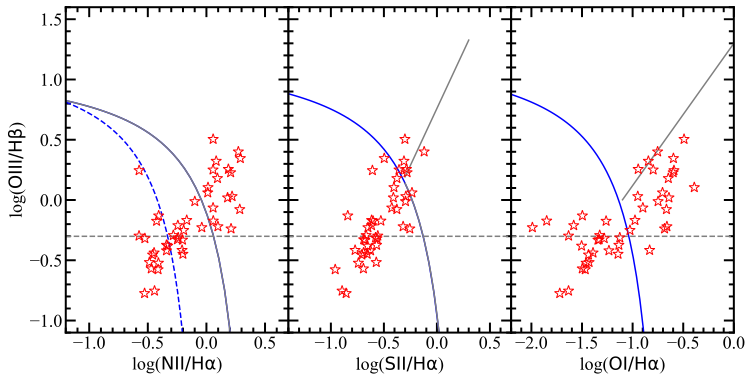

In [53]:
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(hspace=0., wspace = 0.)
ax = fig.add_subplot(1,3,1)



line1='h_alpha_flux'
line1_err='h_alpha_flux_err'

line2='h_beta_flux'
line2_err='h_beta_flux_err'

line3='oiii_5007_flux'
line3_err='oiii_5007_flux_err'


line4='nii_6584_flux'
line4_err='nii_6584_flux_err'

line5='sii_6717_flux'
line5_err='sii_6717_flux_err'

line6='oi_6300_flux'
line6_err='oi_6300_flux_err'

color_label='red'

dataplot= DyingAGN_candidata_line

ax=plot_lineratio_errorbar(ax,dataplot,line4,line1,line3,line2,xerr=None,yerr=None,color_n=color_label,marker_n=None,size_n=None,logx=True,logy=True,blank_plot=True)
set_ax_tick(ax) 
set_ax_locator(ax,xma=0.5,xmi=0.1,yma=0.5,ymi=0.1)
#set_ax_legend(ax,bbox_to_anchor=(0.01, 0.99))   
#ax.set_ylim(-7,17)
#ax.set_xlabel(r'log($L_{\rm X}/L_{\rm Edd}$)')
ax.set_ylabel(r'log(${\rm OIII}/{\rm H{\beta}}$)')
ax.set_xlabel(r'log(${\rm NII}/{\rm H{\alpha}}$)')





ax2 = fig.add_subplot(1,3,2,sharey=ax)

xlabel='log_Lx/Ledd'
ylabel='los_nh(10^22)'
xerr_label='log_f_err'
yerr_label='los_nh_err'#'zphabs_nh_err'


ax2=plot_lineratio_errorbar(ax2,dataplot,line5,line1,line3,line2,xerr=None,yerr=None,color_n=color_label,marker_n=None,size_n=None,logx=True,logy=True,blank_plot=True)

set_ax_tick(ax2) 
#ax2.set_ylabel(r'log${\rm OIII}/{\rm H{\beta}}$')
ax2.set_xlabel(r'log(${\rm SII}/{\rm H{\alpha}}$)')
ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
set_ax_locator(ax2,xma=0.5,xmi=0.1,yma=0.5,ymi=0.1)
#set_ax_locator(ax,xma=1000,xmi=500,yma=1,ymi=0.5)
#set_ax_legend(ax3,bbox_to_anchor=(0.51, 0.99))   
#ax.set_ylim(-7,17)
#ax.semilogy()
#ax.set_xlabel(r'log($L_{\rm 2-10keV}/L_{\rm Edd}$)')
#ax3.set_ylabel(r'$N_{\rm H,los (10^{22} cm^{-2})}$')
#ax3.set_ylim(-5,85)

#ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
#ax2.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
#ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
#ax2.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

#ax.semilogx()
#ax.semilogy()
#ax2.semilogx()
#ax2.semilogy()
ax3 = fig.add_subplot(1,3,3,sharey=ax)

ax3=plot_lineratio_errorbar(ax3,dataplot,line6,line1,line3,line2,xerr=None,yerr=None,color_n=color_label,marker_n=None,size_n=None,logx=True,logy=True,blank_plot=True)
set_ax_tick(ax3) 
#ax2.set_ylabel(r'log${\rm OIII}/{\rm H{\beta}}$')
ax3.set_xlabel(r'log(${\rm OI}/{\rm H{\alpha}}$)')
ax3.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',labelsize=0)
set_ax_locator(ax3,xma=0.5,xmi=0.1,yma=0.5,ymi=0.1)


ax.set_ylim(-1.1,1.6)
ax.set_xlim(-1.2,0.7)
ax2.set_xlim(-1.4,0.7)
ax3.set_xlim(-2.2,0)

ax.plot(Line_BPT_NII_over_Halpha,y_Line_BPT_OIII_over_Hbeta,color='blue',ls='--')
ax.plot(Line_BPT_NII_over_Halpha_composite,y_Line_BPT_OIII_over_Hbeta_Composite,color='blue',ls='-')

ax.plot(Line_BPT_NII_over_Halpha_SL,y_Line_BPT_NII_over_Halpha_SL,color='grey',ls='-')



ax2.plot(Line_BPT_SII_over_Halpha,y_Line_BPT_OIII_over_Hbeta_2,color='blue')



ax2.plot(Line_BPT_SII_over_Halpha_SL,y_Line_BPT_SII_over_Halpha_SL,color='grey')
ax2.plot(Line_BPT_SII_over_Halpha_SL,y1_Line_BPT_SII_over_Halpha_SL,color='grey')



ax3.plot(Line_BPT_OI_over_Halpha, y_Line_BPT_OI_over_Hbeta,color='blue')

#ax3.plot(Line_BPT_OI_over_Halpha_SL,y_Line_BPT_OI_over_Halpha_SL,color='grey')
ax3.plot(Line_BPT_OI_over_Halpha_SL,y1_Line_BPT_OI_over_Halpha_SL,color='grey')

ax.axhline(np.log10(0.5),color='grey',ls='--')
ax2.axhline(np.log10(0.5),color='grey',ls='--')
ax3.axhline(np.log10(0.5),color='grey',ls='--')


#ax.set_title('%s model'%model_name)
save_lc_img_path=os.path.join('/Users/lyubing/Downloads/DyingAGN/','DydingAGN_candidates_BPT.png') 
plt.savefig(save_lc_img_path,dpi=400, transparent=False, bbox_inches='tight')
#plt.close()    

In [ ]:
DyingAGN_candidata_line[]